In [ ]:
from importlib import reload
import data_cleaning_rules
reload(data_cleaning_rules)

from data_cleaning_rules import InsuranceDataCleaner
cleaner = InsuranceDataCleaner("./data/raw_data.xlsx")
df = cleaner.clean()

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

PALETTE = "Set3"
sns.set_palette(PALETTE)
sns.color_palette(PALETTE)

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

In [14]:
df.sample(5)

,Age,Driving_experience,Bonus_Malus,Model,Brand,Vehicle_type,Steering_wheel_location,Color,Insurance_premium,Privileges,Car_age,Insurance_months,Region
5233,43,9,7,Other,Porsche,Легковые автомобили,Слева,Черный,16277,Не инвалид,16,12,Алматинская область
3531,27,9,7,Other,Mercedes-Benz,Легковые автомобили,Слева,Черный,18800,Не инвалид,33,12,Алматинская область
10258,54,12,8,Other,ГАЗ,Легковые автомобили,Слева,Белый,5428,Не инвалид,23,6,Алматинская область
10415,43,8,5,Other,ГАЗ,Легковые автомобили,Слева,Прочие,8983,Не инвалид,39,12,Акмолинская область
3996,34,16,8,Pajero,Mitsubishi,Легковые автомобили,Слева,Прочие,10161,Не инвалид,18,11,Астана


In [23]:
df.shape

(10902, 13)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10902 entries, 0 to 10908
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      10902 non-null  int64 
 1   Driving_experience       10902 non-null  int64 
 2   Bonus_Malus              10902 non-null  int64 
 3   Model                    10902 non-null  object
 4   Brand                    10902 non-null  object
 5   Vehicle_type             10902 non-null  object
 6   Steering_wheel_location  10902 non-null  object
 7   Color                    10902 non-null  object
 8   Insurance_premium        10902 non-null  int64 
 9   Privileges               10902 non-null  object
 10  Car_age                  10902 non-null  int32 
 11  Insurance_months         10902 non-null  int64 
 12  Region                   10902 non-null  object
dtypes: int32(1), int64(5), object(7)
memory usage: 1.1+ MB


In [16]:
df.describe()

,Age,Driving_experience,Bonus_Malus,Insurance_premium,Car_age,Insurance_months
count,10902.000000,10902.000000,10902.00000,10902.000000,10902.000000,10902.000000
mean,47.351862,17.956797,7.36718,10933.732618,25.777472,10.673271
std,12.795866,8.712328,1.70596,5732.619701,7.735468,2.523356
min,24.000000,0.000000,1.00000,66.000000,12.000000,1.000000
25%,37.000000,12.000000,7.00000,6412.750000,19.000000,11.000000
50%,46.000000,18.000000,8.00000,9479.500000,26.000000,12.000000
75%,56.000000,20.000000,9.00000,15667.000000,31.000000,12.000000
max,91.000000,64.000000,9.00000,59669.000000,70.000000,12.000000


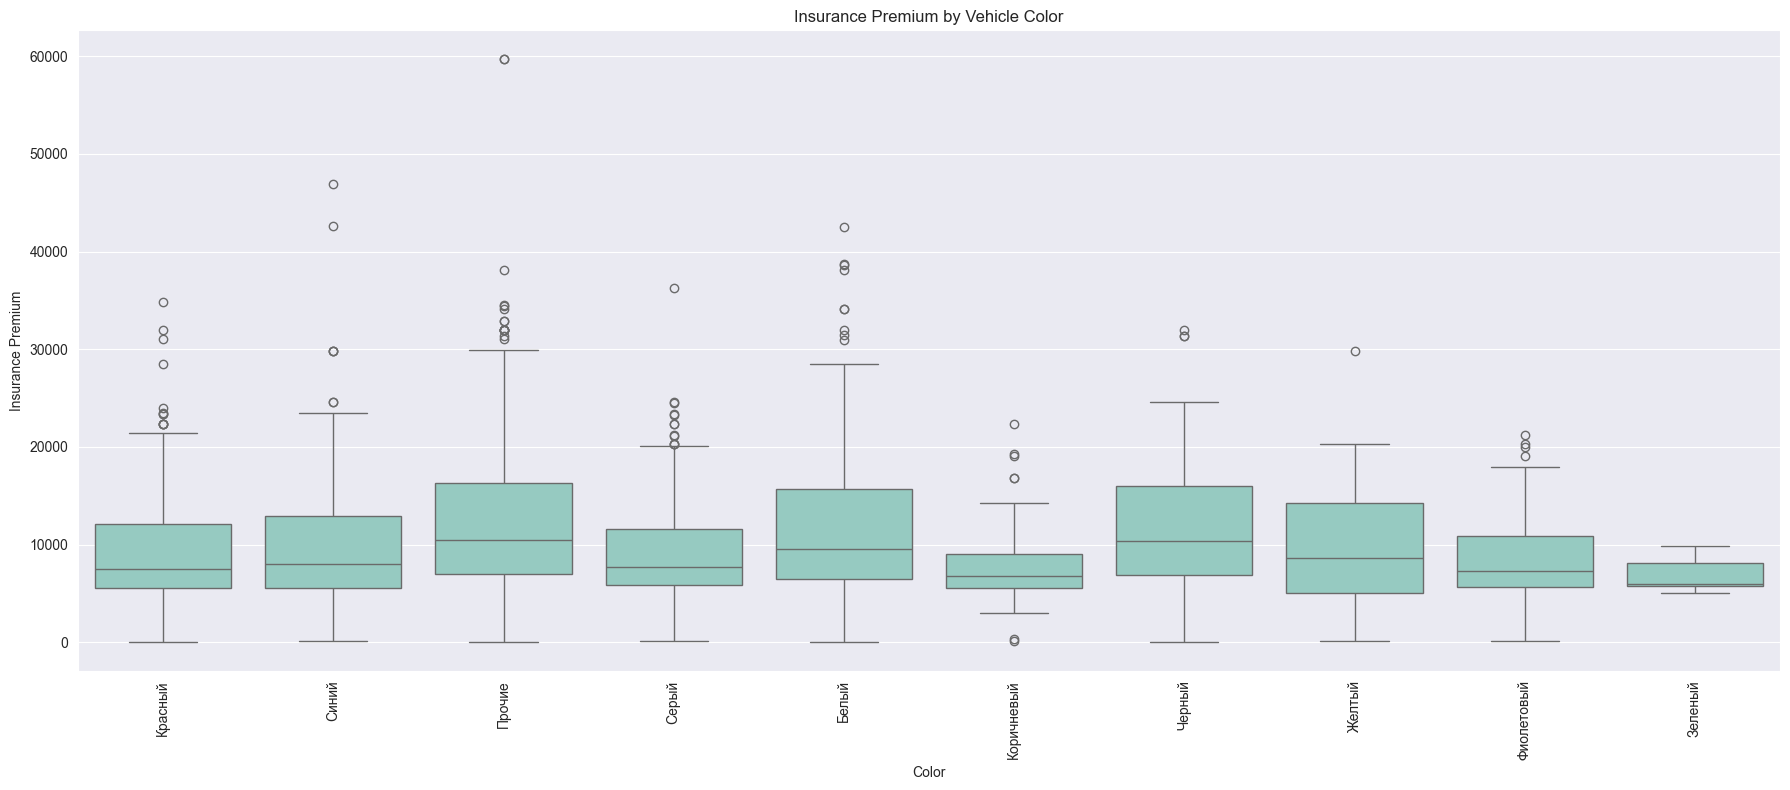

In [20]:
plt.figure(figsize=(18, 8))
sns.boxplot(x='Color', y='Insurance_premium', data=df)
plt.xticks(rotation=90)
plt.title('Insurance Premium by Vehicle Color')
plt.xlabel('Color')
plt.ylabel('Insurance Premium')
plt.tight_layout()
plt.show()


---

### Interpretation:

* While vehicle color **may reflect certain stylistic preferences**, it does **not appear to significantly influence insurance pricing** on its own.
* The **broad ranges and presence of outliers** in many color categories suggest that **other features** (e.g., car type, driver experience, insurance duration) play a **more substantial role** in determining premiums.

---


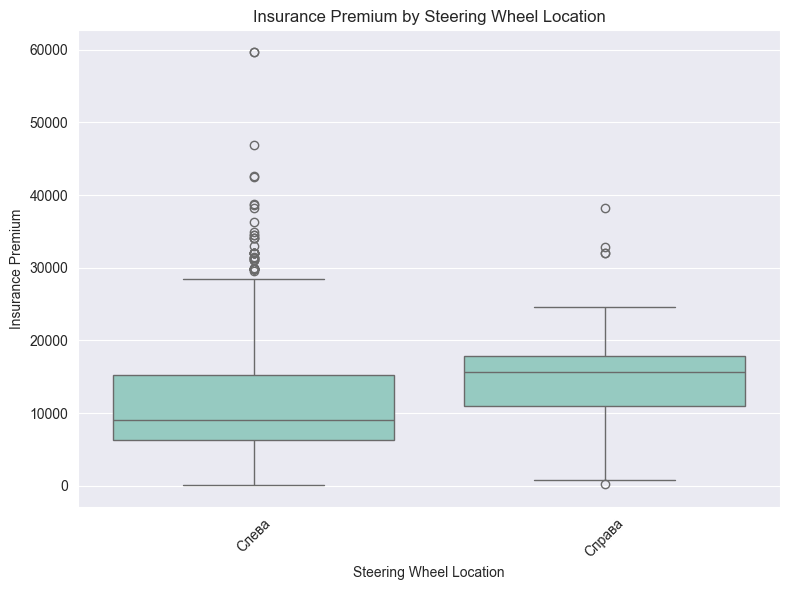

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Steering_wheel_location', y='Insurance_premium', data=df)
plt.title('Insurance Premium by Steering Wheel Location')
plt.xlabel('Steering Wheel Location')
plt.ylabel('Insurance Premium')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


---

### Interpretation:

* Right-hand drive vehicles (`Справа`) are likely treated as **higher-risk** or **less standard**, potentially due to:

  * Higher maintenance costs or accident rates
  * Import restrictions or driving adaptation concerns in Kazakhstan

* Left-hand drive (`Слева`) vehicles, being the **standard in Kazakhstan**, cover a **wider range of customer types**, leading to more outliers and variability in pricing.

---


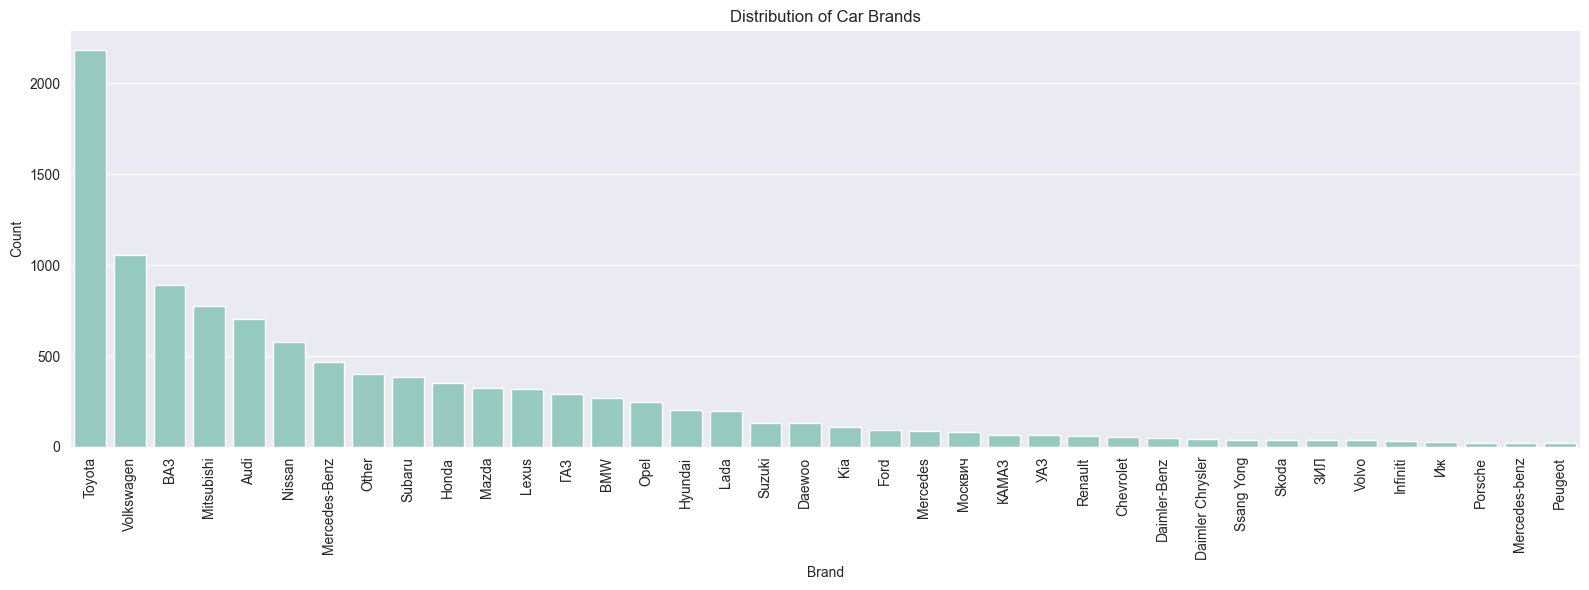

In [22]:
brand_counts = df['Brand'].value_counts()

plt.figure(figsize=(16, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values)
plt.xticks(rotation=90)
plt.title('Distribution of Car Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


---

### Distribution of Car Brands

#### Key Observations:

1. **Toyota Dominates the Dataset**

   * **Toyota** is the most common brand by far, with over **2,200** vehicles in the dataset.
   * This likely reflects both market preference in Kazakhstan and Toyota’s reputation for reliability and availability.

2. **Highly Skewed Distribution**

   * After Toyota, the number of records drops significantly:

     * Brands like **Volkswagen**, **BA3**, **Mitsubishi**, and **Audi** follow but with much lower counts.
   * A **long tail** of brands appears with very low frequencies, many of which are grouped as `'Other'`.


---

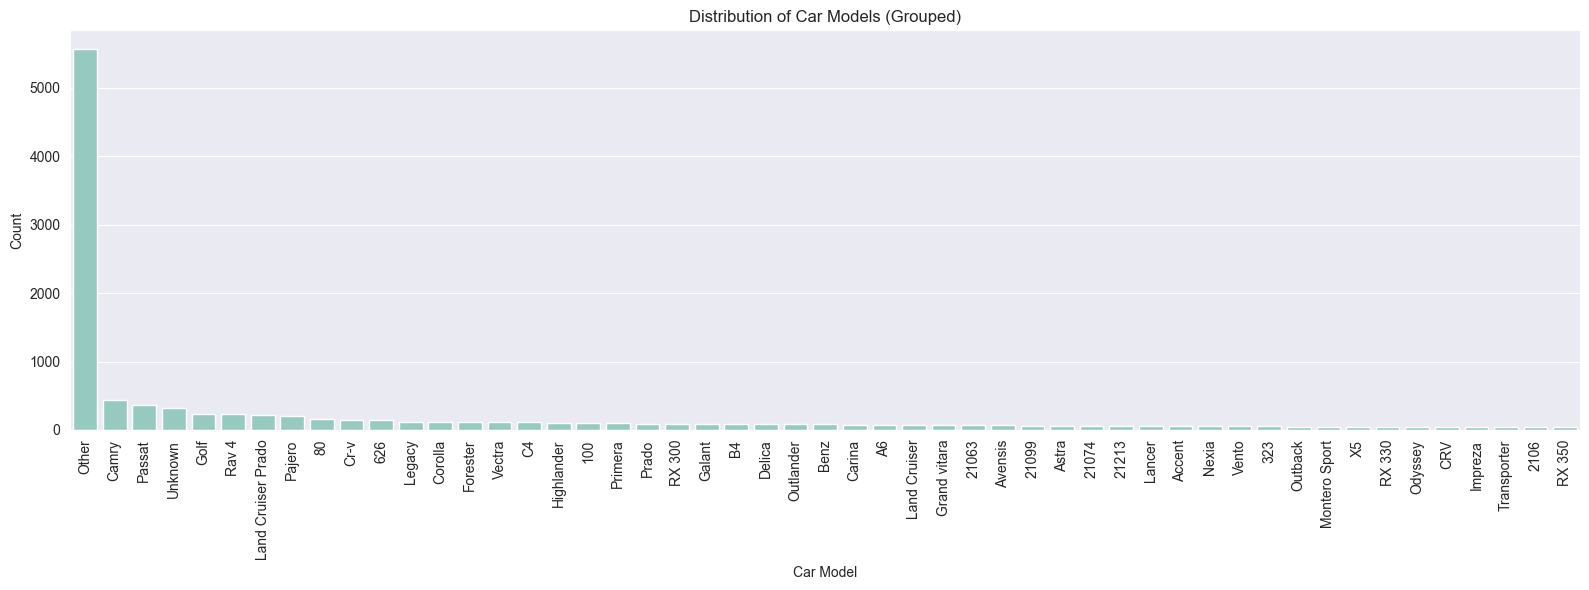

In [24]:
model_counts = df['Model'].value_counts()

plt.figure(figsize=(16, 6))
sns.barplot(x=model_counts.index, y=model_counts.values)
plt.xticks(rotation=90)
plt.title('Distribution of Car Models (Grouped)')
plt.xlabel('Car Model')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


---

### Distribution of Car Models (Grouped)

#### Key Observations:

1. **'Other' Dominates the Distribution**

   * A very large portion of the car models have been grouped into the category `'Other'`, with over **5,000 instances**.
   * This suggests that the dataset originally contained **a high number of unique or rare car model names**, which were consolidated to reduce dimensionality.

2. **Few Models Have High Frequency**

   * Only a small number of specific car models (like **Camry**, **Passat**) occur with notable frequency.
   * The model `'Unknown'`refers to entries where the actual model name was `"."` in original dataset.

---


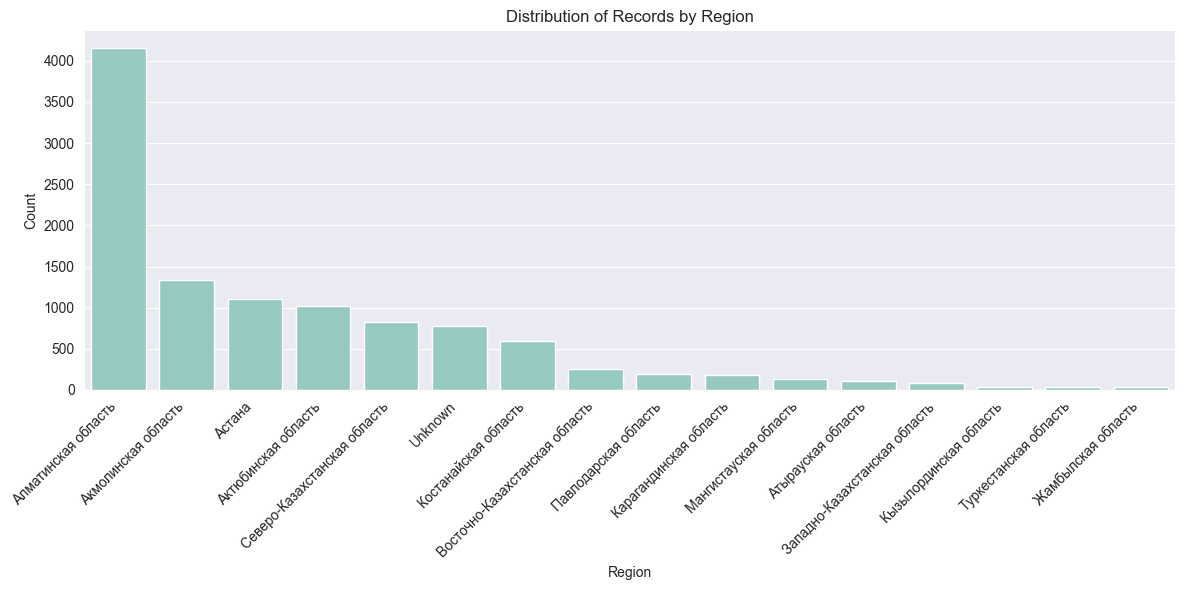

In [25]:
region_counts = df['Region'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Records by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.tight_layout()
plt.show()




---

### Distribution of Insurance Records by Region

#### Key Observations:

1. **Алматинская область (Almaty Region) Dominates the Data**

   * This region has **over 4,000** records, far more than any other.
   * Possible reasons include: higher population density, more vehicle ownership, and more active insurance registration.

2. **Top 5 Contributors**

   * After Almaty Region, the next most represented areas are:

     * Акмолинская область (Akmola region)
     * Астана (Astana)
     * Актюбинская область (Aktobe region)
     * Северо-Казахстанская область (North Kazakhstan)

---


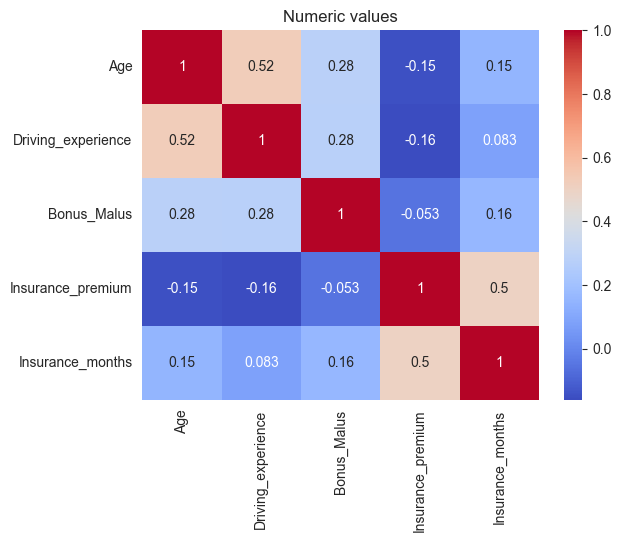

In [35]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Numeric values")
plt.show()


---

#### Key Insights:

#### 1. **Age vs Driving Experience**

* **Correlation: +0.52**
* As expected, older individuals tend to have more driving experience. The strong positive correlation reflects a **natural relationship** between these variables.

---

#### 2. **Age & Driving Experience vs Bonus\_Malus**

* **Age → Bonus\_Malus: +0.28**
* **Driving Experience → Bonus\_Malus: +0.28**
* Older and more experienced drivers tend to receive **better Bonus-Malus scores** (i.e., lower-risk profiles). T

---

#### 3. **Insurance Premium vs All Variables**

* Weak negative correlations with:

  * **Age (-0.15)** and **Driving Experience (-0.16)**:
    More experienced or older drivers tend to pay **slightly lower premiums**, reflecting lower perceived risk.
  * **Bonus\_Malus (-0.05)**:
    Very weak inverse relationship, suggesting **other factors beyond Bonus-Malus** influence premium pricing.

* Moderate **positive correlation with Insurance Duration (0.50)**:
  Longer contracts tend to **cost more overall**, which makes intuitive sense (you pay more for 12 months than 1 month).

---


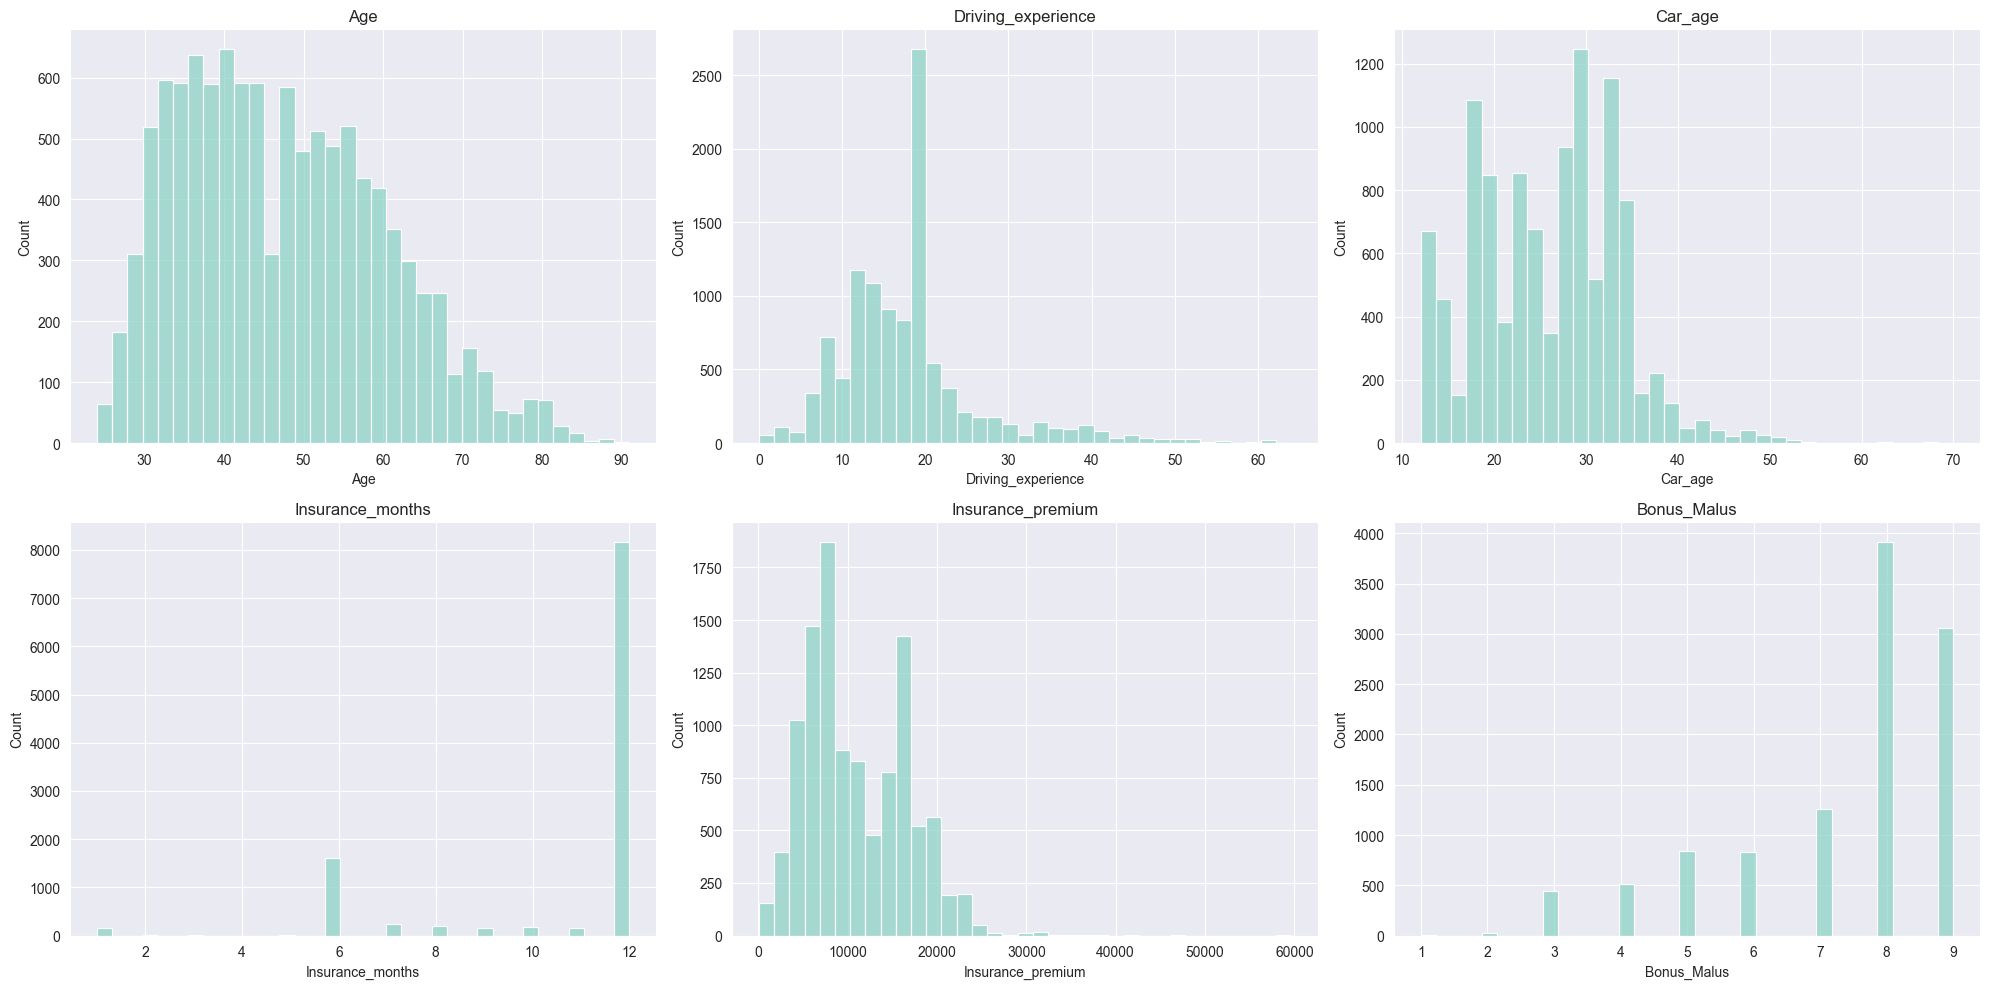

In [26]:
columns = ['Age', 'Driving_experience', 'Car_age', 'Insurance_months', 'Insurance_premium', 'Bonus_Malus']


fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()


for i, column in enumerate(columns):
    sns.histplot(data=df,
                 x=column,
                 bins=35,
                 ax=axes[i],
                 kde=False)

    axes[i].set_title(column)
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()


---

### Distribution Analysis of Key Numerical Features

#### 1. **Age**

* The age distribution is **right-skewed**, with most drivers aged **30 to 50**.
* Suggests a concentration of mid-age drivers in the insured population.

---

#### 2. **Driving Experience**

* The distribution peaks sharply at **\~18–20 years** of experience.
* Many drivers fall within the **5–20 years** range.
* This may reflect a licensing age around 18 and dominance of middle-aged drivers.

---

#### 3. **Car Age**

* The most common car age is around **25–30 years**.
* Distribution is **right-skewed**
---

#### 4. **Insurance Duration (`Insurance_months`)**

* Most policies are for **12 months**, followed by a peak at **6 months**.
* Very few records fall outside these two common durations.
* This reflects common insurance product offerings (half-year and full-year policies).

---

#### 5. **Insurance Premium**

* The distribution is **right-skewed** with a visible **bimodal structure**.
* Most premiums range between **5,000–20,000**, but outliers exceed **60,000**.
* Two distinct peaks may correspond to **different customer segments**, such as:

  * Budget vs. luxury cars
  * Low vs. high risk drivers

---

#### 6. **Bonus-Malus Score**

* Most common values are **8 and 9**, suggesting many drivers receive top risk scores (safe drivers).
* Very few drivers have low scores (1–3), indicating that **high-risk drivers are rare**.
* Shows the Bonus-Malus system is effective at rewarding safer profiles.

---

### General Insights:

* Most variables are **right-skewed**.
* The **bimodality** in premiums hints at segmentation within the data.
* Drivers are generally **middle-aged with moderate experience**, insuring **older vehicles** under **standard long-term contracts**.

---

### Bimodal distribution of target variable.

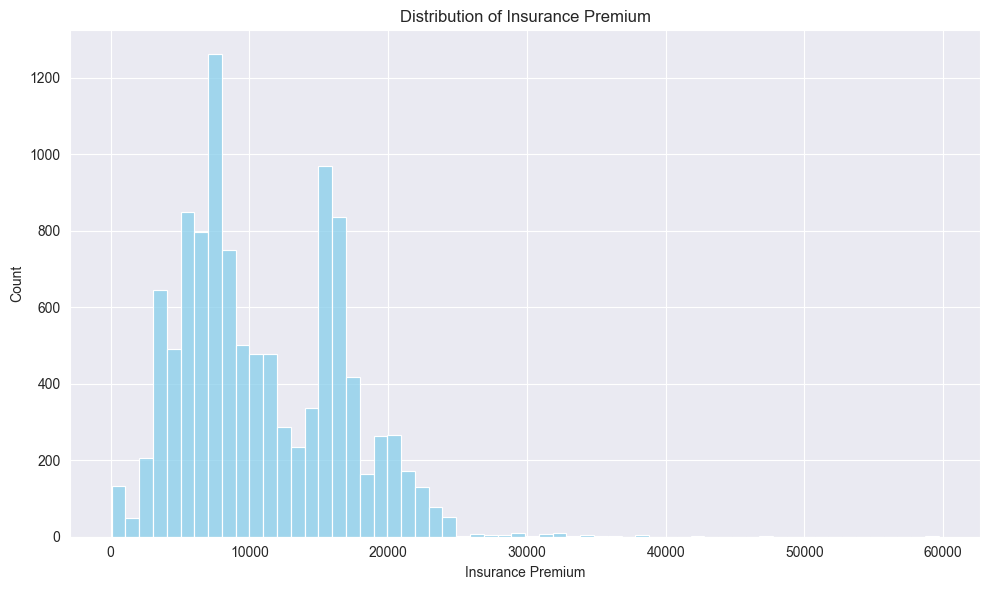

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Insurance_premium'], bins=60, color='skyblue')
plt.title('Distribution of Insurance Premium')
plt.xlabel('Insurance Premium')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#### Let's investigate why target varibale has bimodal distribution.

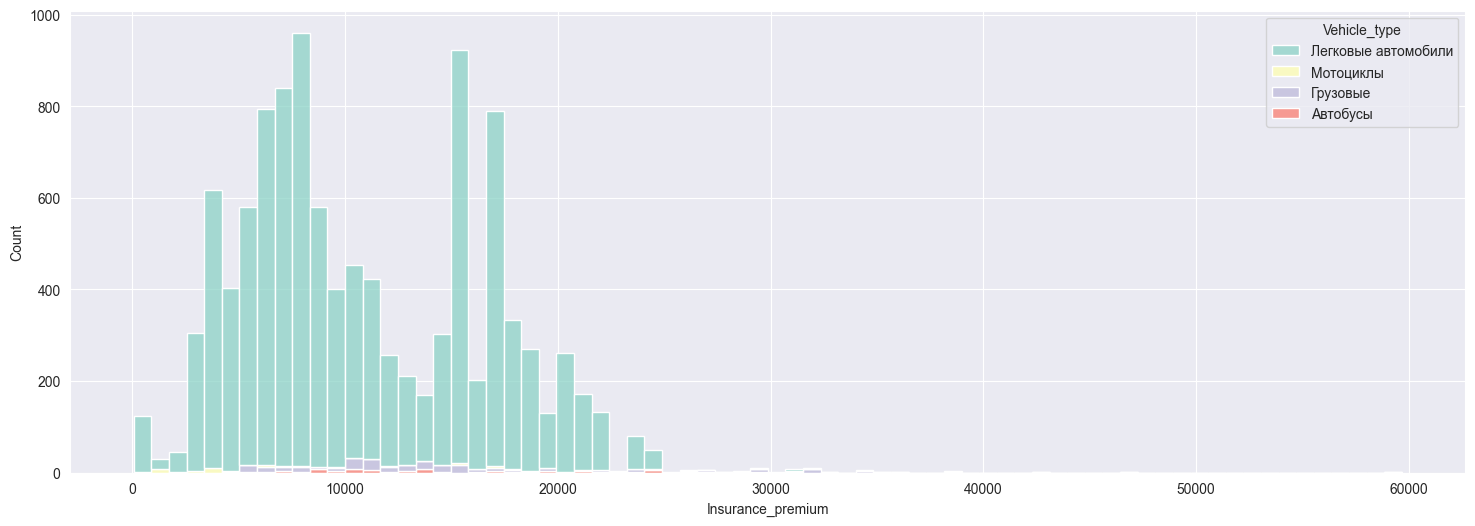

In [28]:
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x='Insurance_premium', hue='Vehicle_type', multiple='stack')
plt.show()


---

### Vehicle Type Distribution and Bimodality Insight

* The plot shows that **'Легковые автомобили' (passenger cars)** make up the **vast majority** of the dataset.
* Other vehicle types are **rare** and have **minimal influence** on the overall distribution.

### Understanding the Bimodal Pattern

* The **bimodal shape** in the premium histogram is **not** caused by mixing different vehicle types (e.g., cars vs. trucks).
* Instead, it originates from **two distinct subgroups within the passenger car category** itself:

  * Experienced vs. new drivers
  * Short-term vs. long-term insurance policies
  * Low-risk vs. high-risk car models

---


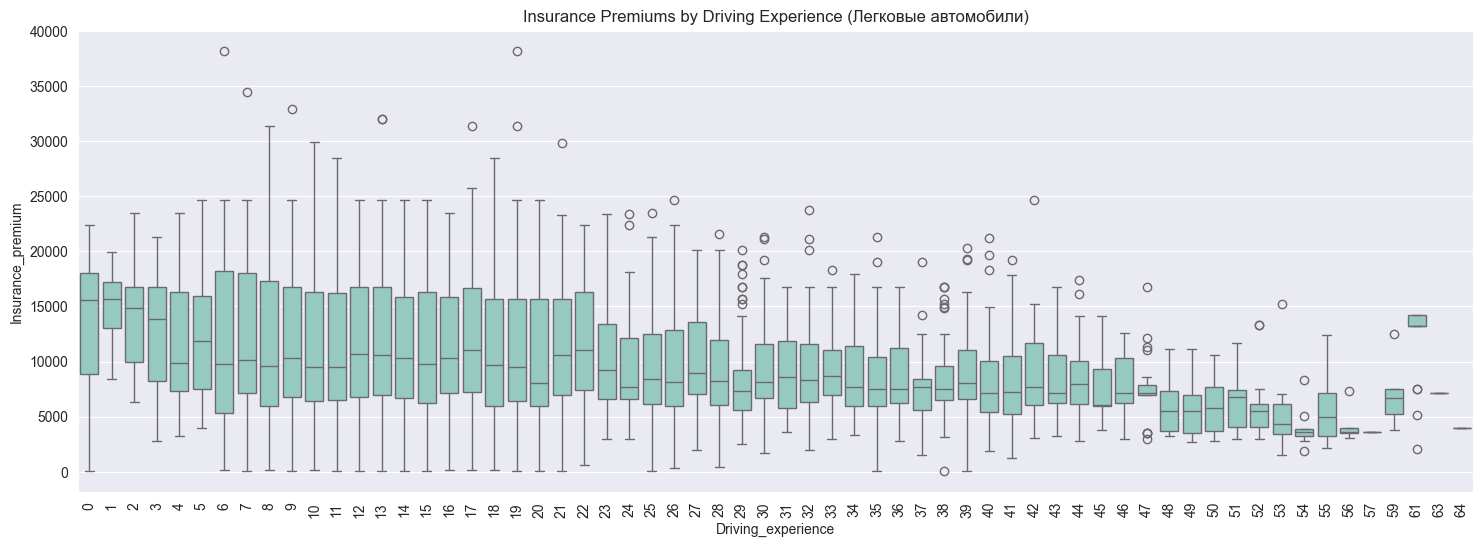

In [29]:
cars_df = df[df["Vehicle_type"] == "Легковые автомобили"]

plt.figure(figsize=(18, 6))
sns.boxplot(x='Driving_experience', y='Insurance_premium', data=cars_df)
plt.title('Insurance Premiums by Driving Experience (Легковые автомобили)')
plt.xticks(rotation=90)
plt.show()


---

### Driving Experience vs. Insurance Premium

* **Premiums generally decrease** as **driving experience increases**.
* Drivers with **less experience** tend to pay **higher** and **more variable** premiums, reflecting greater perceived risk.

---



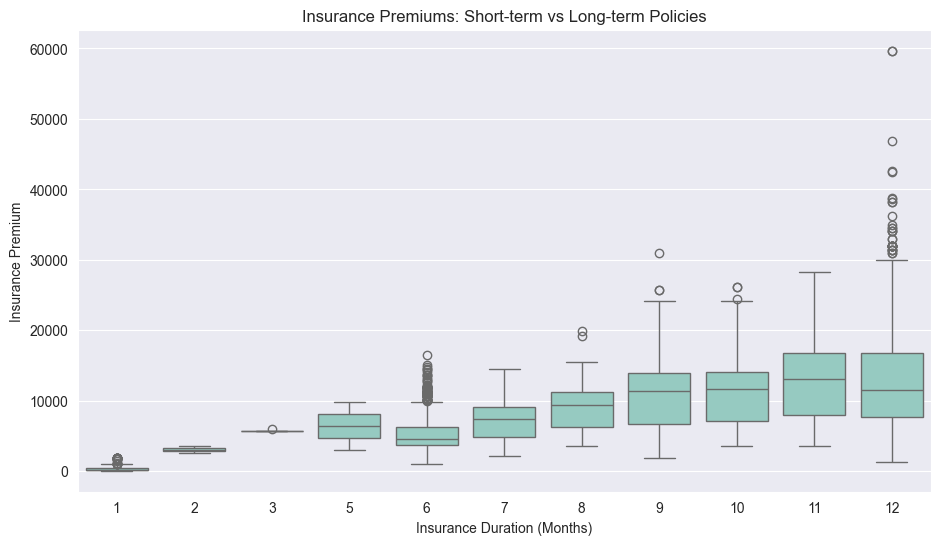

In [33]:
plt.figure(figsize=(11, 6))
sns.boxplot(x='Insurance_months', y='Insurance_premium', data=df)
plt.title('Insurance Premiums: Short-term vs Long-term Policies')
plt.xlabel('Insurance Duration (Months)')
plt.ylabel('Insurance Premium')
plt.show()


---

### Relationship Between Insurance Duration and Premium

#### Clear Upward Trend

As the **insurance duration increases**, the **insurance premium** tends to increase as well. This indicates a positive relationship between policy length and cost.


#### Wide Premium Spread at Longer Durations (11–12 Months)

* At **12 months**, the range of premiums is **especially broad** — from around **2,000** to extreme outliers exceeding **60,000**.
* This wide variation helps explain the **right-skewed tail** or even the **second peak** in the **bimodal distribution** observed in the overall premium data.
* The spread likely reflects a **diverse mix of customer profiles**, including:

  * Owners of **standard vehicles**
  * Owners of **high-end or luxury cars**

---

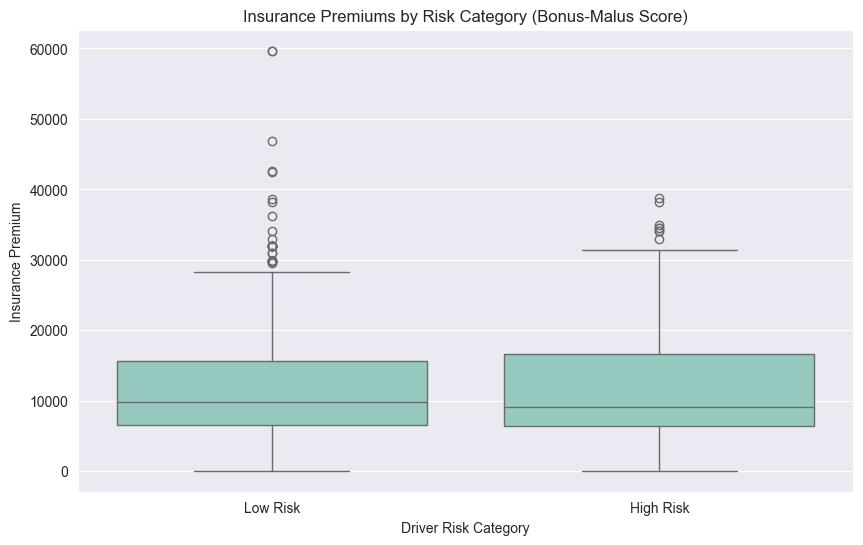

In [34]:
threshold = df['Bonus_Malus'].median()

# Categorize into High Risk and Low Risk
df['Risk_Category'] = df['Bonus_Malus'].apply(lambda x: 'Low Risk' if x >= threshold else 'High Risk')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Risk_Category', y='Insurance_premium', data=df)
plt.title('Insurance Premiums by Risk Category (Bonus-Malus Score)')
plt.xlabel('Driver Risk Category')
plt.ylabel('Insurance Premium')
plt.show()


---

### Insurance Premiums by Risk Group (Bonus-Malus Score)

This boxplot compares the distribution of insurance premiums for two driver groups:

* **Low Risk Drivers** — high Bonus-Malus scores
* **High Risk Drivers** — low Bonus-Malus scores

#### Overlap Insight:

There is a **significant overlap** in premium ranges between the two groups.
This suggests that while **Bonus-Malus is an important indicator**, it **does not fully explain** or separate premium pricing on its own. Other variables likely contribute to the final insurance premium.

---